<span style="font-family:Times New Roman; font-size:14pt;">
<h2 align="center"><b>Simulation and Performance Evaluation of a Car Insurance Assessment Center</b></h2>
</span>

<span style="font-family:Times New Roman; font-size:14pt;  line-height: 0.15;">
<h4 align="center"><b>Sadra Daneshvar</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   98104111
<h4 align="center"><b>Soroush Etminanbakhsh</b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 98103891
</h4>
</span>




<span style="font-family:Times New Roman; font-size:15pt;">
<h4><b>1. Problem Overview and Prior Work<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

The car insurance assessment center is facing challenges related to its operational efficiency and capacity management. With limited resources and a specific working schedule from 8:00 am to 6:00 pm, the center struggles to accommodate all incoming cars and provide timely services. 

One significant issue is that if a car arrives after the center's closing time, it cannot be assessed until the next working day, causing delays and potential customer dissatisfaction. Another factor complicating the center's operations is the requirement for paired cars to arrive together. If one car arrives without its partner, it must wait for the partner to arrive before the assessment process can begin. This prioritization of paired cars further adds to the complexity of managing the center's workflow.

Additionally, the assessment center has a queue for taking photos, but it has a limited capacity. When the queue is full, cars have to wait outside until space becomes available. This not only leads to longer waiting times but also poses challenges in terms of space management and organizing the incoming cars effectively.

To address these issues and improve the overall performance of the center, a comprehensive study has been conducted utilizing discrete-event simulation. This simulation aims to model the system and provide statistical measures of its performance. By simulating various scenarios, we can analyze the system's behavior and identify potential bottlenecks or areas for improvement.

In the earlier phases of the project, our main objective was to develop a comprehensive description of the system, both in terms of its static and dynamic aspects. This encompassed the identification and definition of state variables, entities, and events that play a crucial role in the assessment center's operations. Additionally, we created flow diagrams for each event to effectively illustrate the logic and the interconnectedness between them.

State variables, such as queue lengths at different sections of the center, as well as the status of photographers, documenters/fulfillers, complaint experts, and evaluation experts, have been identified to capture the dynamic nature of the system. Entities, representing the vehicles, have also been defined, including attributes such as entrance number, pairing status, and complaint status. Events that impact the state of the system, such as arrivals, departures, and shift start/end, have been categorized to simulate the center's workflow accurately.

Another crucial aspect that required consideration was ensuring that all our activities, including interarrival times, partner arrival times, service durations, and others, adhered to specific distributions and were generated accordingly. While several of these distributions were already known and provided, we had to undertake input modeling for the fulfillment service time to ensure accuracy and appropriateness. To achieve this, we began by preparing the data and subsequently selected a distribution that was both intuitive and in accordance with the nature of the phenomenon under investigation. Following this, we employed a q-q plot to visualize the distribution and conducted statistical tests such as the chi-square and Kolmogorov-Smirnov to validate our hypothesis.

</span>

<span style="font-family:Times New Roman; font-size:15pt;">
<h4><b>2. Implementation of Simulation Model and Performance Evaluation<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

In the current phase of the project, we are focusing on coding and programming the simulation model in Python. This involves implementing the logic and flow of events, considering the different activities, interarrival times, service times, and delays associated with each event. Once the simulation model is fully developed, we will analyze the output and perform sensitivity analysis to assess the system's performance under various scenarios.

The insights gained from this simulation study will provide valuable information regarding the efficiency and effectiveness of the car insurance assessment center. It will enable informed decision-making and offer potential avenues for improving resource allocation and process optimization. By identifying areas of improvement, the center can enhance its operational capacity and better serve its customers, resulting in a more streamlined and satisfactory car insurance assessment process.

<span>

<span style="font-family:Times New Roman; font-size:14pt;">
<h4><b>2.1. Code and Step-by-Step Explanation<b></h4>
<span>
<span style="font-family: Times New Roman; font-size: 13pt;">

The following is the complete program designed for this simulation, accompanied by comprehensive explanations. To enhance convenience and readability, the code has been divided into distinct blocks, each serving a specific purpose. Before each block, a detailed explanation is provided to outline the operations performed within it and clarify its underlying logic. Additionally, a comment is provided for each line of code to alleviate any potential confusion for readers.

<span>

<span style="font-family: Times New Roman; font-size: 13pt;">

The code block below imports four libraries: simpy, random, pandas, and numpy. Let's break down what each library does:

- simpy: Simpy is a process-based discrete-event simulation library in Python. It provides components to model and simulate various types of systems. In this code, simpy is likely being used to create simulations and model system behavior.

- random: The random module is a standard library in Python that provides functions for generating random numbers. It is commonly used for tasks such as randomizing elements, shuffling lists, or generating random values within a specified range.

- pandas: Pandas is a powerful data manipulation library in Python. It provides data structures and functions for efficiently handling and analyzing structured data. It is commonly used for tasks such as data cleaning, transformation, and analysis.

- numpy: NumPy is a fundamental library for scientific computing in Python. It provides a powerful N-dimensional array object and various tools for working with arrays. NumPy is widely used for numerical operations, mathematical functions, and data manipulation.

<span>

In [37]:
import simpy  # Importing the simpy library for discrete-event simulation
import random  # Importing the random library for generating random numbers
import pandas as pd  # Importing the pandas library for data manipulation
import numpy as np  # Importing the numpy library for numerical operations


<span style="font-family: Times New Roman; font-size: 13pt;">

The code block below defines two functions: `exponential_generator` and `triangular_generator`. Let's break down each function and its purpose:

- `exponential_generator(mean)`: This function generates a random number from an exponential distribution with a specified mean (`mean`) using its inverse cumulative density function.

- `triangular_generator(Min, Max, Mode)`: This function generates a random number from a triangular distribution with specified minimum (`Min`), maximum (`Max`), and mode (`Mode`) values using its inverse cumulative density function.
<span>

In [38]:
def exponential_generator(mean):

    # Generate a random number between 0 and 1
    random_number = random.random()
    
    # Calculate the exponential number
    exp_number = -mean * np.log(random_number)
    
    return exp_number

def triangular_generator(Min, Max, Mode):
    
    # Generate a random number between 0 and 1
    random_number = random.random()
    
    # Calculate the triangular number
    if (random_number >= 0) and (random_number < (Mode-Min)/(Max-Min)):
        tri_number = np.sqrt((Max-Min)*(Mode-Min)*random_number)+Min
    else:
        tri_number = Max - np.sqrt((1-random_number)*(Max-Min)*(Max-Mode))
        
    return tri_number

<span style="font-family: Times New Roman; font-size: 13pt;">

The following code block defines the function `car_generator` that models the generation and processing of cars in our simulation. Here's a breakdown of the code:

1. The function takes several input parameters:

   - `env`: The simulation environment.
   - `PROB_INDIVIDUAL_ARRIVAL`: Probability of an individual car arrival.
   - `mean_photography`: Average time of photography service.
   - `min_documentation`, `max_documentation`, `mode_documentation`: Parameters for triangular distribution used to generate documentation service time.
   - `mean_evaluation`: Average time of evaluation service.
   - `mean_complaint`: Average time of complaint handling service.
   - `min_fulfillment`, `max_fulfillment`, `mode_fulfillment`: Parameters for triangular distribution used to generate fulfillment service time.
   - `photographer`, `expert`: Resources representing the photographers and experts (experts are those in charge of documentation and fulfillment procedures).
   - `evaluation_expert`, `complaint_expert`: Resources representing the evaluation and complaint experts.
   - `photo_queue`: Photographer's queue as a resource (since it has a capacity of limited cars).
   - `Photo_Queue_Capacity`: Capacity of the photo queue.
    

<span style="display: inline-block; margin-top: -0.5em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. A global variable `car_status` is declared.<span>


3. A variable `car_id` is initialized to 0.

4. A while loop is used to model the generation and processing of cars until the simulation time reaches 600 (that is when the shift ends).
5. Inside the while loop:
   - A list `Car_Attributes` of length 32 is created and appended to the `list_of_cars` (this is to monitor each car's journey and store their critical turning events).
   - The car ID is assigned to the first element of `Car_Attributes`.
   - The car status (either "Alone" or "Paired") is determined based on a random probability.
   - The weather condition is simulated by generating a random number and assigning the appropriate mean customer arrival rate based on the current simulation time and weather conditions.
   - The time for the next car arrival is generated using the `exponential_generator` function and the mean customer arrival rate.
   - The simulation is paused for the generated time using `yield env.timeout(next_car_arrival)`.
   - The arrival time is assigned to the second element of `Car_Attributes`.
   - The event generator process is started by calling the `event_generator` function and passing the required parameters (this is where each car starts their journey through our system). 
   - The car ID is incremented for the next iteration of the while loop.

<span>

In [39]:
def car_generator(env, PROB_INDIVIDUAL_ARRIVAL, mean_photography, photo_queue,
                  min_documentation, max_documentation, mode_documentation, mean_evaluation,
                  mean_complaint, min_fulfillment, max_fulfillment, mode_fulfillment,
                  photographer, expert, Photo_Queue_Capacity, evaluation_expert, complaint_expert):

    global car_status  # Declare the car_status variable as global
    car_id = 0  # Initialize the car_id variable to 0
    
    while env.now < 600:  # Continue the loop until the simulation time reaches 600
        
        Car_Attributes = [0] * 32  # Create a list of length 32 to store car attributes
        list_of_cars.append(Car_Attributes)  # Append the Car_Attributes list to the list_of_cars
        
        list_of_cars[car_id][0] = car_id  # Assign the car_id to the first element of Car_Attributes
        
        if random.random() < PROB_INDIVIDUAL_ARRIVAL:  # Check if the randomly generated probability is less than PROB_INDIVIDUAL_ARRIVAL
            car_status = "Alone"  # if true, set car_status to "Alone"
            list_of_cars[car_id][1] = car_status  # Assign car_status to the second element of Car_Attributes
        else:
            car_status = "Paired"  # if false, set car_status to "Paired"
            list_of_cars[car_id][1] = car_status  # Assign car_status to the second element of Car_Attributes
        
        wheather_con = random.random()  # Generate a random number to simulate weather conditions
        
        # Determine the mean customer arrival rate based on the weather condition and simulation time
        if (wheather_con < 0.31) and (env.now in range(0, 120)):
            mean_customer_arrival = 1
        if (wheather_con < 0.31) and (env.now in range(120, 300)):
            mean_customer_arrival = 0.5
        if (wheather_con < 0.31) and (env.now in range(300, 420)):
            mean_customer_arrival = 4
        if (wheather_con < 0.31) and (env.now in range(420, 600)):
            mean_customer_arrival = 2
        if (wheather_con >= 0.31) and (env.now in range(0, 120)):
            mean_customer_arrival = 2
        if (wheather_con >= 0.31) and (env.now in range(120, 300)):
            mean_customer_arrival = 3
        if (wheather_con >= 0.31) and (env.now in range(300, 420)):
            mean_customer_arrival = 5
        if (wheather_con >= 0.31) and (env.now in range(420, 600)):
            mean_customer_arrival = 3
        
        next_car_arrival = exponential_generator(mean_customer_arrival)  # Generate the time for the next car arrival
        yield env.timeout(next_car_arrival)  # Pause the simulation for the generated time
        
        arrival = env.now  # Get the current simulation time as the arrival time
        list_of_cars[car_id][2] = arrival  # Assign the arrival time to the third element of Car_Attributes
        
        # Start the event generator process
        env.process(event_generator(env, car_id, mean_photography, photo_queue, Photo_Queue_Capacity,
                                    min_documentation, max_documentation, mode_documentation,
                                    mean_evaluation, mean_complaint, min_fulfillment,
                                    max_fulfillment, mode_fulfillment, photographer, expert,
                                    evaluation_expert, complaint_expert))
        
        car_id += 1  # Increment the car_id for the next iteration


<span style="font-family: Times New Roman; font-size: 13pt;">

The code block below defines the `event_generator` function, responsible for generating and processing various events for each car in the simulation. Essentially, this function governs the main journey that each car embarks upon and serves as a critical component on which everything depends.

 Here's a breakdown of the code:

1. The function takes several input parameters:
   - `env`: The simulation environment
   - `car_id`: The ID of the car for which events are being generated (basically tells which car is on their journey).
   - `mean_photography`: Average time of photography service.
   - `min_documentation`, `max_documentation`, `mode_documentation`: Parameters for triangular distribution used to generate documentation service time.
   - `mean_evaluation`: Average time of evaluation service.
   - `mean_complaint`: Average time of complaint handling service.
   - `min_fulfillment`, `max_fulfillment`, `mode_fulfillment`: Parameters for triangular distribution used to generate fulfillment service time.
   - `photographer`, `expert`: Resources representing the photographers and experts (experts are those in charge of documentation and fulfillment procedures).
   - `evaluation_expert`, `complaint_expert`: Resources representing the evaluation and complaint experts.
   - `photo_queue`: Photographer's queue as a resource (since it has a capacity of limited cars).
   - `Photo_Queue_Capacity`: Capacity of the photo queue.

<span style="display: inline-block; margin-top: -0.5em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. The function begins with an if-else statement to check the car status ("Paired" or "Alone") and perform the corresponding events.<span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. If the car is "Paired":<br>

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the photo queue resource with a priority of 1. The reason behind this is that when cars are not alone, they have the option to join the photo queue. However, if a lonely car's partner arrives, it takes priority and enters the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; queue first. Therefore, we assign a priority of 1 to paired cars and a priority of 0 to cars coming from the parking lot, ensuring that cars from the parking lot are given higher priority.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until there's enough capacity).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time entered the queue for photography.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Various attributes related to the queue time are updated in the car's attributes.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the photographer resource.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until a server becomes idle).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time left the queue for photography.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The time spent in the queue for photography is calculated and recorded.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A random photography service time is sampled using the exponential distribution with the provided mean.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the sampled photography time (until the pair of cars is finished with the photoshoot).<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. If the car is "Alone":<br>

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the parking lot resource (that's if there's no outside queue).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A partner arrival time is sampled using the exponential distribution with the provided mean.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The partner arrival time is calculated by adding the sampled time to the current simulation time.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The partner arrival time is recorded in the car's attributes.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the partner arrival time (which is until the partner arrives).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the photo queue resource with a priority of 0. As we explained earlier, these cars have priority over those who came with their partner from the go.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until there's enough capacity).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time entered the queue for photography.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Various attributes related to the queue time are updated in the car's attributes.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the photographer resource.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until a server becomes idle).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time left the queue for photography.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The time spent in the queue for photography is calculated and recorded.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A random photography time is sampled using the exponential distribution with the provided mean.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the sampled photography time (until the pair of cars is finished with the photoshoot).<br>

<span style="display: inline-block; margin-top: -0.5em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. After the photography event, the code proceeds to the documentation event.<span><br>

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time entered the queue for documentation.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the expert resource with a priority of 1. This is because cars that are ready for fulfillment are given priority over those that are only entering the documentation step. Therefore, at this stage, the cars have a priority level of 1, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; which is lower than the priority level of 0 assigned to cars coming for fulfillment.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until a server becomes idle).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time left the queue for documentation.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The time spent in the queue for documentation is calculated and recorded.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A random documentation time is sampled using the triangular distribution with the provided parameters.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the sampled documentation time (until the pair of cars is done filing documnets).<br>

<span style="display: inline-block; margin-top: -0.5em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. After the documentation event, the code proceeds to the evaluation event.<span><br>

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time entered the queue for evaluation.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the evaluation expert resource.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until a server becomes idle).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time left the queue for evaluation.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The time spent in the queue for evaluation is calculated and recorded.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A random evaluation time is sampled using the exponential distribution with the provided mean.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the sampled evaluation time (until the pair of cars is done being evaluated).<br>

<span style="display: inline-block; margin-top: -0.5em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. The code then proceeds to a decision branch with a 10% chance of entering the complaint handling event.<span><br>

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;* If the branch is taken:<br>

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time entered the queue for complaint.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the complaint expert resource.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until a server becomes idle).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time left the queue for complaint.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The time spent in the queue for complaint is calculated and recorded.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A random complaint handling time is sampled using the exponential distribution with the provided mean.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the sampled complaint handling time (until the pair of cars has handled its complaint).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time entered the queue for evaluation after complaint.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the evaluation expert resource.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until a server becomes idle).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time left the queue for evaluation after complaint.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The time spent in the queue for evaluation after complaint is calculated and recorded.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A random evaluation time after complaint is sampled using the exponential distribution with the provided mean.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the sampled evaluation time (until the pair of cars is done being evaluated).<br>

<span style="display: inline-block; margin-top: -0.5em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6. After the complaint handling event or if the complaint branch is not taken:<span><br>

   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time entered the queue for fulfillment.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A request is made to acquire the expert resource with a priority of 0 (as explained earlier).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields until the request is granted (which is until a server becomes idle).<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The current simulation time is recorded as the time left the queue for fulfillment.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The time spent in the queue for fulfillment is calculated and recorded.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- A random fulfillment time is sampled using the triangular distribution with the provided parameters.<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- The simulation yields for the sampled fulfillment time (until the fulfillment procedure for the pair of cars is finished).<br>

<span style="display: inline-block; margin-top: -0.5em;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7. Finally, the departure time is recorded, and various attributes related to the time spent in the system are updated in the car's attributes.<span><br>

<span>

In [40]:
def event_generator(env, car_id, mean_photography, photo_queue, Photo_Queue_Capacity,
                    min_documentation, max_documentation, mode_documentation,
                    mean_evaluation, mean_complaint, min_fulfillment, max_fulfillment,
                    mode_fulfillment, photographer, expert, evaluation_expert, complaint_expert):      

    if car_status == "Paired":

        # Request the photo queue resource with priority 1
        with photo_queue.request(priority=1) as request:
            yield request

            # Record the time entered the queue for photography
            time_entered_queue_for_photography = env.now
            list_of_cars[car_id][5] = time_entered_queue_for_photography

            # Calculate the time spent in the queue for photography
            list_of_cars[car_id][30] = time_entered_queue_for_photography - list_of_cars[car_id][2]

            # Request the photographer resource
            with photographer.request() as photographer_request:
                yield photographer_request

                # Record the time left the queue for photography
                time_left_queue_for_photography = env.now
                list_of_cars[car_id][6] = time_left_queue_for_photography

                # Calculate the time spent in the queue for photography
                time_in_queue_for_photography = time_left_queue_for_photography - time_entered_queue_for_photography
                list_of_cars[car_id][7] = time_in_queue_for_photography

                # Sample the photography time using exponential distribution
                sampled_photography_time = exponential_generator(mean_photography)
                list_of_cars[car_id][8] = sampled_photography_time

                # Yield for the sampled photography time
                yield env.timeout(sampled_photography_time)

    elif car_status == "Alone":

        # Record the time when the car enters the queue to enter the area inside
        list_of_cars[car_id][3] = env.now

        # Request the parking lot resource
        with parking_lot.request() as request:
            yield request

            # Sample the partner arrival time using exponential distribution
            partner_arrival_time = exponential_generator(mean_partner_arrival)
            partner_arrival = partner_arrival_time + env.now

            # Record the partner arrival time
            list_of_cars[car_id][4] = partner_arrival

            # Yield for the partner arrival time
            yield env.timeout(partner_arrival_time)

            # Request the photo queue resource with priority 0
            with photo_queue.request(priority=0) as request:
                yield request

            # Record the time entered the queue for photography
            time_entered_queue_for_photography = env.now
            list_of_cars[car_id][5] = time_entered_queue_for_photography

            # Calculate the time spent in the queue for photography
            list_of_cars[car_id][30] = time_entered_queue_for_photography - partner_arrival

            # Request the photographer resource
            with photographer.request() as photographer_request:
                yield photographer_request

                # Record the time left the queue for photography
                time_left_queue_for_photography = env.now
                list_of_cars[car_id][6] = time_left_queue_for_photography

                # Calculate the time spent in the queue for photography
                time_in_queue_for_photography = time_left_queue_for_photography - time_entered_queue_for_photography
                list_of_cars[car_id][7] = time_in_queue_for_photography

                # Sample the photography time using exponential distribution
                sampled_photography_time = exponential_generator(mean_photography)
                list_of_cars[car_id][8] = sampled_photography_time

                # Yield for the sampled photography time
                yield env.timeout(sampled_photography_time)

    # Record the time entered the queue for documentation
    time_entered_queue_for_documentation = env.now
    list_of_cars[car_id][9] = time_entered_queue_for_documentation

    # Request the expert resource with priority 1 for documentation
    with expert.request(priority=1) as req:
        yield req

        # Record the time left the queue for documentation
        time_left_queue_for_documentation = env.now
        list_of_cars[car_id][10] = time_left_queue_for_documentation

        # Calculate the time spent in the queue for documentation
        time_in_queue_for_documentation = time_left_queue_for_documentation - time_entered_queue_for_documentation
        list_of_cars[car_id][11] = time_in_queue_for_documentation

        # Sample the documentation time using triangular distribution
        sampled_documentation_time = triangular_generator(min_documentation, max_documentation, mode_documentation)
        list_of_cars[car_id][12] = sampled_documentation_time

        # Yield for the sampled documentation time
        yield env.timeout(sampled_documentation_time)

    # Record the time entered the queue for evaluation
    time_entered_queue_for_evaluation = env.now
    list_of_cars[car_id][13] = time_entered_queue_for_evaluation

    # Request the evaluation expert resource
    with evaluation_expert.request() as req:
        yield req

        # Record the time left the queue for evaluation
        time_left_queue_for_evaluation = env.now
        list_of_cars[car_id][14] = time_left_queue_for_evaluation

        # Calculate the time spent in the queue for evaluation
        time_in_queue_for_evaluation = time_left_queue_for_evaluation - time_entered_queue_for_evaluation
        list_of_cars[car_id][15] = time_in_queue_for_evaluation

        # Sample the evaluation time using exponential distribution
        sampled_evaluation_time = exponential_generator(mean_evaluation)
        list_of_cars[car_id][16] = sampled_evaluation_time

        # Yield for the sampled evaluation time
        yield env.timeout(sampled_evaluation_time)

    # Make a decision branch with 10% chance of entering the complaint handling event
    decide_branch = random.uniform(0, 1)

    if decide_branch < 0.1: # If true, the cars want to file a complaint

        # Record the time entered the queue for complaint
        time_entered_queue_for_complaint = env.now
        list_of_cars[car_id][17] = time_entered_queue_for_complaint

        # Request the complaint expert resource
        with complaint_expert.request() as req:
            yield req

            # Record the time left the queue for complaint
            time_left_queue_for_complaint = env.now
            list_of_cars[car_id][18] = time_left_queue_for_complaint

            # Calculate the time spent in the queue for complaint
            time_in_queue_for_complaint = time_left_queue_for_complaint - time_entered_queue_for_complaint
            list_of_cars[car_id][19] = time_in_queue_for_complaint

            # Sample the complaint handling time using exponential distribution
            sampled_complaint_time = exponential_generator(mean_complaint)
            list_of_cars[car_id][20] = sampled_complaint_time

            # Yield for the sampled complaint handling time
            yield env.timeout(sampled_complaint_time)
        
        # Record the time entered the queue for evaluation after complaint
        time_entered_queue_for_evaluation_after_complaint = env.now
        list_of_cars[car_id][21] = time_entered_queue_for_evaluation_after_complaint

        # Request the evaluation expert resource
        with evaluation_expert.request() as req:
            yield req

            # Record the time left the queue for evaluation after complaint
            time_left_queue_for_evaluation_after_complaint = env.now
            list_of_cars[car_id][22] = time_left_queue_for_evaluation_after_complaint

            # Calculate the time spent in the queue for evaluation after complaint
            time_in_queue_for_evaluation_after_complaint = (time_left_queue_for_evaluation_after_complaint
                                                            - time_entered_queue_for_evaluation_after_complaint)
            list_of_cars[car_id][23] = time_in_queue_for_evaluation_after_complaint

            # Sample the evaluation time using exponential distribution
            sampled_evaluation_time_after_complaint = exponential_generator(mean_evaluation)
            list_of_cars[car_id][24] = sampled_evaluation_time_after_complaint

            # Yield for the sampled evaluation time
            yield env.timeout(sampled_evaluation_time)

        # Record the time entered the queue for fulfillment
        time_entered_queue_for_fulfillment = env.now
        list_of_cars[car_id][25] = time_entered_queue_for_fulfillment

        # Request the expert resource with priority 0 for fulfillment
        with expert.request(priority=0) as req:
            yield req

            # Record the time left the queue for fulfillment
            time_left_queue_for_fulfillment = env.now
            list_of_cars[car_id][26] = time_left_queue_for_fulfillment

            # Calculate the time spent in the queue for fulfillment
            time_in_queue_for_fulfillment = time_left_queue_for_fulfillment - time_entered_queue_for_fulfillment
            list_of_cars[car_id][27] = time_in_queue_for_fulfillment

            # Sample the fulfillment time using triangular distribution
            sampled_fulfillment_time = triangular_generator(min_fulfillment, max_fulfillment, mode_fulfillment)
            list_of_cars[car_id][28] = sampled_fulfillment_time

            # Yield for the sampled fulfillment time
            yield env.timeout(sampled_fulfillment_time)

    else:
        # Record the time entered the queue for fulfillment
        time_entered_queue_for_fulfillment = env.now
        list_of_cars[car_id][25] = time_entered_queue_for_fulfillment

        # Request the expert resource with priority 0 for fulfillment
        with expert.request(priority=0) as req:
            yield req

            # Record the time left the queue for fulfillment
            time_left_queue_for_fulfillment = env.now
            list_of_cars[car_id][26] = time_left_queue_for_fulfillment

            # Calculate the time spent in the queue for fulfillment
            time_in_queue_for_fulfillment = time_left_queue_for_fulfillment - time_entered_queue_for_fulfillment
            list_of_cars[car_id][27] = time_in_queue_for_fulfillment

            # Sample the fulfillment time using triangular distribution
            sampled_fulfillment_time = triangular_generator(min_fulfillment, max_fulfillment, mode_fulfillment)
            list_of_cars[car_id][28] = sampled_fulfillment_time

            # Yield for the sampled fulfillment time
            yield env.timeout(sampled_fulfillment_time)

    # Record the time left the system
    departure_time = env.now
    list_of_cars[car_id][29] = departure_time

    # Calculate the time spent in the system
    Time_Spent_in_System = list_of_cars[car_id][29] - list_of_cars[car_id][2]
    list_of_cars[car_id][31] = Time_Spent_in_System


<span style="font-family: Times New Roman; font-size: 13pt;">

The following code block defines a function called `observe` that takes several parameters: 
- `env`: The simulation environment
- `photo_queue`: Resource representing the photographers queue
- `photographer`: Resource representing the photographers
- `expert`: Resource representing the experts (experts are those in charge of documentation and fulfillment procedures)
- `evaluation_expert`: Resource representing the evaluation expert
- `complaint_expert`: Resource representing the complaint expert
- `parking_lot`: Resource representing the parking lot

These parameters are used within the observe function to access and record various metrics or states of the simulation. They provide information about the lengths of queues, usage counts of resources, and simulation time, which can be useful for analyzing and evaluating the system's behavior.

With this function, we can practically capture a snapshot of the system status at any desired moment, allowing us to identify important criteria and performane indices and leverage them for further analysis. Additionally, the `observation_step` parameter determines the frequency at which we monitor the system status. By decreasing this parameter, although it may slow down the code, we gain the advantage of storing more detailed information for our analysis.

<span>

In [41]:
def observe(env, photo_queue, photographer, expert, evaluation_expert, complaint_expert, parking_lot):
    
    while env.now < 6000:
        # Continue the loop until the simulation time (env.now) reaches 6000. This is an arbitrary value and its purpose is to process this function until a time when we're sure our system is empty.
        # Since each day is 600 minutes, we can fairly say that by the time 6000 (ten times of the amount of a work day) the whole system is empty.
        # In this way, we avoid any chance of missing data

        observation_time.append(env.now)
        # Append the current simulation time (env.now) to the "observation_time" list.
        
        photo_queue_length.append(len(photographer.queue))
        # Append the length of the "photographer" queue to the "photo_queue_length" list.
        
        outside_queue_length.append(len(photo_queue.queue))
        # Append the length of the "photo_queue" queue to the "outside_queue_length" list.
        
        expert_queue_length.append(len(expert.queue))
        # Append the length of the "expert" queue to the "expert_queue_length" list.
        
        evaluation_queue_length.append(len(evaluation_expert.queue))
        # Append the length of the "evaluation_expert" queue to the "evaluation_queue_length" list.
        
        complaint_queue_length.append(len(complaint_expert.queue))
        # Append the length of the "complaint_expert" queue to the "complaint_queue_length" list.
        
        parking_lot_length.append(len(parking_lot.queue))
        # Append the length of the "parking_lot" queue to the "parking_lot_length" list.
        
        photographer_usage.append(photographer.count)
        # Append the count of the "photographer" resource to the "photographer_usage" list.
        
        expert_usage.append(expert.count)
        # Append the count of the "expert" resource to the "expert_usage" list.
        
        evaluation_usage.append(evaluation_expert.count)
        # Append the count of the "evaluation_expert" resource to the "evaluation_usage" list.
        
        complaint_usage.append(complaint_expert.count)
        # Append the count of the "complaint_expert" resource to the "complaint_usage" list.
        
        parking_usage.append(parking_lot.count)
        # Append the count of the "parking_lot" resource to the "parking_usage" list.
        
        yield env.timeout(observation_step)
        # Yield the simulation control back to the environment and resume after a timeout of "observation_step".


<span style="font-family: Times New Roman; font-size: 13pt;">

The code block below defines several lists, namely `car_column_names`, `days_column_names`, and `observation_column_names`. These lists are used to store column names for data tables or data frames that will be used for analysis and reporting purposes.

Let's break down the purpose of each list and its corresponding column names:

1. `car_column_names`: This list contains column names related to various stages and durations of a car's journey through the system. It includes information such as the car ID, partner, arrival times, queue start times, event start times, durations, and departure time.

2. `days_column_names`: This list contains column names related to daily statistics and performance metrics. It includes information such as the day ID, number of cars serviced, average time each car spent in the system, probabilities of queue emptiness, average cars in the parking lot, and efficiencies of different resources.

3. `observation_column_names`: This list contains column names related to observations taken at specific times during the simulation. It includes information such as the observation time, queue lengths, and resource usages.

These lists provide a clear and structured representation of the data that will be collected and analyzed during the simulation. They serve as references for labeling the columns in the resulting data tables or data frames, making it easier to interpret and work with the simulation results.

<span>

In [42]:
# No need for comments or whatsoever; Everything is perfectly clear :)

car_column_names = ['Car ID',
    'Partner',
    '1. Car Arrival',
    '2. Parking Entry',
    '3. Partner Arrival',

    '4. Time Entered Area Inside',
    '5. Start of Photography Event',
    '6. Time in Queue for Photography',
    '7. Photography Duration',

    '8. Documentation Queue Start',
    '9. Start of Documentation Event',
    '10. Time in Queue for Documentation',
    '11. Documentation Duration',

    '12. Evaluation Queue Start',
    '13. Start of Evaluation Event',
    '14. Time in Queue for Evaluation',
    '15. Evaluation Duration',

    '16. Complaint Queue Start',
    '17. Start of Complaint Event',
    '18. Time in Queue for Complaint',
    '19. Complaint Duration',

    '20. Evaluation after Complaint Queue Start',
    '21. Start of Evaluation after Complaint Event',
    '22. Time in Queue for Evaluation after Complaint',
    '23. Evaluation after Complaint Duration',

    '24. Fulfillment Queue Start',
    '25. Start of Fulfillment Event',
    '26. Time in Queue for Fulfillment',
    '27. Fulfillment Duration',

    '28. Departure Time',
    '29. Time in Outside Queue',
    '30. Time Spent in System']

days_column_names = ['Day ID',
                     
    'Number of Cars Serviced',
    'Number of Cars Lost',
    'Average Time each Car Spent in System',

    'Probability of Photography Queue Being Empty',
    'Probability of Outside Queue Being Empty',
    'Probability of Expert Queue Being Empty',
    'Probability of Evaluation Queue Being Empty',
    'Probability of Complaint Queue Being Empty',
    'Average Cars in the Parking Lot',
    

    'Photgrapher Efficiency',
    'Expert Efficiency',
    'Evaluation Efficiency',
    'Complaint Efficiency',


    'Average Photography Queueing',
    'Average Outside Queueing',
    'Average Documnetation Queueing',
    'Average Evaluation Queueing',
    'Average Complaint Queueing',
    'Average Evaluation After Complaint Queueing',
    'Average Fulfillment Queueing',


    'Maximum Photography Queueing',
    'Maximum Outside Queueing',
    'Maximum Documnetation Queueing',
    'Maximum Evaluation Queueing',
    'Maximum Complaint Queueing',
    'Maximum Evaluation After Complaint Queueing',
    'Maximum Fulfillment Queueing',


    'Average Photography Queue Length',
    'Average Outside Queue Length',
    'Average Documnetation Queue Length',
    'Average Evaluation Queue Length',
    'Average Complaint Queue Length',
    'Average Parking Lot Queue Length',



    'Maximum Photography Queue Length',
    'Maximum Outside Queue Length',
    'Maximum Documnetation Queue Length',
    'Maximum Evaluation Queue Length',
    'Maximum Complaint Queue Length',
    'Maximum Parking Lot Queue Length']

observation_column_names = ['Observation Time',
                     
    'Photography Queue Length',
    'Outside Queue Length',
    'Expert Queue Length',
    'Evaluation Queue Length',
    'Complaint Queue Length',
    'Parking Lot Length',
    

    'Photgrapher Usage',
    'Expert Usage',
    'Evaluation Usage',
    'Complaint Usage',
    'Parking Usage']

<span style="font-family: Times New Roman; font-size: 13pt;">

The following code block prompts the user to input two values using the `input()` function and converts them to integers using the `int()` function. Let's break down each line and its purpose:

1. `number_of_days`: This line allows the user to specify the length of time (in days) for which they want to run the simulation. The desired length asked in the project is a month (30 days).

2. `replication_number`: This line allows the user to specify the number of times they want to replicate the simulation. The user is also provided with a reminder that choosing a higher number of replications will increase the runtime of the program.

These input statements enable the user to customize the simulation by specifying the desired length of time and the number of replications to be performed. The values entered by the user will be used in subsequent parts of the code to control the simulation behavior.

<span>

In [43]:
# Once again, No need for comments or whatsoever; Everything is perfectly clear :)

number_of_days = int(input("We'd love to know the desired length of time for running the simulation. How many days do you have in mind?"))
replication_number = int(input("How many times would you like the simulation to be replicated? Just keep in mind that the more replications you choose, the longer it will take for the program to run."))

<span style="font-family: Times New Roman; font-size: 13pt;">

The given code block defines four empty lists and sets. Let's break down each line and its purpose:

1. `list_of_FEL_data`: This list is intended to store data related to the Future Event List (FEL) during the simulation for each iteration. So for instance, if the program runs 10 times, the length of this list would be 10.

2. `list_of_observation_dataframe`: This list is intended to store observation dataframes during the simulation for each iteration, same as `list_of_FEL_data`.

3. `replication_list`: This list is intended to store replication-specific data and results during the simulation of each iteration. 

4. `used_seeds`: This set is intended to store unique random number generator seeds that have been used in the simulation so that we can make sure that each iteration is using a different seed. 

These data structures provide storage containers for various aspects of the simulation process. They allow the program to store and organize data generated during the simulation, such as event information, observations, replication-specific results, and random number seeds.

<span>

In [44]:
# No comments and further explanation needed here :)
list_of_FEL_data = []
list_of_observation_dataframe = []
replication_list = []
used_seeds = set()

<span style="font-family: Times New Roman; font-size: 13pt;">

The following code block represents a simulation loop that runs for the number of replications specified by the variable `replication_number`. Each replication also runs for the number of days specified by the variable   `number_of_days`. 

Let's break down the code and its purpose:

Random Seed Generation:
   - The loop starts by generating a random seed using the `random.randint(0, 1000)` function. This seed is used to initialize the random number generator.
   - It checks if the generated seed is already present in the `used_seeds` set. If so, it generates a new random seed until it finds a unique one.
   - The unique seed is added to the `used_seeds` set to ensure it won't be used again.
   - The random number generator is then initialized with the unique seed using `random.seed(seed)`.

Simulation Initialization:
   - Several lists and variables are initialized for each replication of the simulation.
   - `list_of_observations` is an empty list that will store observation data for each day of the simulation.
   - `list_of_data` is an empty list that will store dataframes containing car-specific data for each day of the simulation.
   - `days_list` is a list that will store daily aggregated statistics for each day of the simulation.
   - `day_id` is an identifier for each day in the simulation and starts at 0.

Day-wise Simulation Loop:
   - The simulation loop runs for the specified number of days (`number_of_days`).
   - Within each day, the simulation environment (`env`) is set up.
   - Parameter values for various processes and the number of resources for each process are set.
   - Resources are created for each process using `simpy.Resource` and `simpy.PriorityResource` classes.
   - The simulation processes, `car_generator` and `observe`, are started within the environment using `env.process()`.
   - The simulation environment is run using `env.run()`.

Data Collection and Aggregation:
   - After the simulation for a particular day completes, data related to cars, queues, resource usage, and other metrics are collected.
   - The collected data is stored in a dataframe called `data` and added to the `list_of_data`.
   - The data is then processed and aggregated to calculate various statistics for the day.
   - The calculated statistics are stored in the `days_list` for that particular day.

Replication-level Data Storage:
   - After the completion of all days for a particular replication, the aggregated statistics for each day are stored in a dataframe called `days`.
   - The average statistics for each column of `days` are calculated using `mean()` and stored in a dictionary called `each_run_cumulative_data`. This basically includes all the indicators and metrics needed for each run (being 30 days in our project).
   - The `each_run_cumulative_data` dictionary represents the cumulative statistics for each replication of the simulation.
   - The dictionary is appended to the `replication_list`, which stores the replication-specific data.

Replication-level Observations and FEL Data:
   - The `list_of_observations` containing observation data for each day is concatenated into a single dataframe called `observation_dataframe`.
   - The `observation_dataframe` is appended to the `list_of_observation_dataframe`, which stores the observation data for each replication.
   - The `list_of_data` containing car-specific data for each day is appended to the `list_of_FEL_data`, which stores the data for each replication.

This simulation loop runs the simulation for the specified number of replications, collects data for each replication, and calculates aggregated statistics for each day and replication. The collected data is stored in various lists and data structures for further analysis or processing.

<span>

In [45]:
# Replication-wise Simulation Loop
for i in range(replication_number):

    # Generate a random seed for each replication
    seed = random.randint(0, 1000)

    # Ensure the generated seed is unique
    while seed in used_seeds:
        seed = random.randint(0, 1000)

    # Add the unique seed to the set of used seeds   
    used_seeds.add(seed)

    # Initialize the random number generator with the unique seed
    random.seed(seed)
    
    # Initialize lists and variables for each replication
    list_of_observations = []  # Store observation data for each day
    list_of_data = []  # Store car-specific data for each day
    days_list = []  # Store aggregated statistics for each day
    day_id = 0  # Identifier for each day in the simulation

    # Day-wise Simulation Loop
    for i in range(number_of_days):
        
        list_of_cars = []  # Initialize an empty list to store car information
        
        observation_time = []  # Initialize an empty list to store observation times
        
        photo_queue_length = []  # Initialize an empty list to store photo queue lengths
        outside_queue_length = []  # Initialize an empty list to store outside queue lengths
        
        expert_queue_length = []  # Initialize an empty list to store expert queue lengths
        evaluation_queue_length = []  # Initialize an empty list to store evaluation queue lengths
        complaint_queue_length = []  # Initialize an empty list to store complaint queue lengths
        parking_lot_length = []  # Initialize an empty list to store parking lot lengths
        
        photographer_usage = []  # Initialize an empty list to store photographer usage
        expert_usage = []  # Initialize an empty list to store expert usage
        evaluation_usage = []  # Initialize an empty list to store evaluation usage
        complaint_usage = []  # Initialize an empty list to store complaint usage
        parking_usage = []  # Initialize an empty list to store parking usage

        # Initialize simulation environment
        env = simpy.Environment()

        # Set parameter values for each activity 
        mean_partner_arrival = 30.0 # Given
        mean_photography = 6.0 # Given
        min_documentation = 5.0 # Given
        max_documentation = 7.0 # Given
        mode_documentation = 6.0 # Given
        mean_evaluation = 9.0 # Given
        mean_complaint = 15.0 # Given
        min_fulfillment = 6.07 # Calculated using input data modleing
        max_fulfillment = 8.93 # Calculated using input data modleing
        mode_fulfillment = 8.05 # Calculated using input data modleing
        PROB_INDIVIDUAL_ARRIVAL = 0.3 # Given

        # Set the number of resources for each process
        num_photographers = 2 # Given
        num_experts = 3 # Given
        num_evaluation_experts = 2 # Given
        num_complaint_experts = 1 # Given
        Photo_Queue_Capacity = 20 # Given (Since we interact with pairs of cars, we used 20 instead of 40)
        WAITING_PARKING_CAPACITY = 100000 # Arbitrary (Since the capacity of parking lot is not mentioned and there is no limit to it, it's set to a big number)
        observation_step = 0.5 # Arbitrary (Chosen in a way that serves both speed and accuracy)

        # Create resources for each process
        photographer = simpy.Resource(env, capacity=num_photographers)
        expert = simpy.PriorityResource(env, capacity=num_experts)
        evaluation_expert = simpy.Resource(env, capacity=num_evaluation_experts)
        complaint_expert = simpy.Resource(env, capacity=num_complaint_experts)
        photo_queue = simpy.PriorityResource(env, capacity=Photo_Queue_Capacity)
        parking_lot = simpy.Resource(env, capacity=WAITING_PARKING_CAPACITY)

        # Initialize a list to store day-specific attributes
        Day_Attributes = [0] * 40
        days_list.append (Day_Attributes)
        days_list[day_id][0] = day_id # Assign the day_id to the first element of Day_Attributes

        # Process the car_generator function to start the simulation
        env.process(car_generator(env, PROB_INDIVIDUAL_ARRIVAL, mean_photography, photo_queue,
                                min_documentation, max_documentation, mode_documentation,
                                mean_evaluation, mean_complaint, min_fulfillment, max_fulfillment,
                                mode_fulfillment, photographer, expert, Photo_Queue_Capacity,
                                evaluation_expert, complaint_expert))

        # Process the observe function to record data while the simulation is running
        env.process (observe (env, photo_queue, photographer, expert, 
                    evaluation_expert, complaint_expert, parking_lot))

        # Run the simulation until all servers become idle (becaus we're not using an "until" argument)
        env.run()

        # Creating a data of all cars that came during our simulation day
        data = pd.DataFrame(list_of_cars, columns = car_column_names)

        # Adding the day_id column to it
        data['Day'] = day_id

        # Sorting it by "Time Entered Area Inside"
        data.sort_values(by = '4. Time Entered Area Inside', ascending = True)

        # Deleting cars that enterd our facility after the work shift ends (because basically cars can't enter our system after this time)
        deleted_data = data.loc[data['4. Time Entered Area Inside']>600]
        
        # And now find those cars that enterd our facility before the work shift ends
        # By doing this, we make sure that the data being processed from now on will only belong to the eligible cars
        data = data.loc[data['4. Time Entered Area Inside']<600]
        
        # adding this data to our list if datas (the len of this list should equal the number of days we run the simulation)
        list_of_data.append(data)

        # If you remember, we run observe function until a very long arbitrary time to make sure all the necessary data is stored
        # Now it's time to clean the data captured and stored by this function
        # First we find the maximum departure time; that is when the last pair of cars left the system
        # We want to use this "MAX" parameter to shorten our stored lists up to the last car that has arrived. 
        # To do so we need to devide the maximum departure by the observation step so that the "MAX" parameter (which is the index we're gonna use to truncate our list) to be correct
        MAX = max(data['28. Departure Time']) / observation_step

        # Since indices can't be floats, we make it an integer
        MAX = int(np.floor(MAX)) 

        # Now we truncate and clean the observed data
        observation_time = observation_time[:MAX]  # Truncate the observation_time list to contain at most MAX elements.

        photo_queue_length = photo_queue_length[:MAX]  # Truncate the photo_queue_length list to contain at most MAX elements.
        outside_queue_length = outside_queue_length[:MAX]  # Truncate the outside_queue_length list to contain at most MAX elements.

        expert_queue_length = expert_queue_length[:MAX]  # Truncate the expert_queue_length list to contain at most MAX elements.
        evaluation_queue_length = evaluation_queue_length[:MAX]  # Truncate the evaluation_queue_length list to contain at most MAX elements.
        complaint_queue_length = complaint_queue_length[:MAX]  # Truncate the complaint_queue_length list to contain at most MAX elements.
        parking_lot_length = parking_lot_length[:MAX]  # Truncate the parking_lot_length list to contain at most MAX elements.

        photographer_usage = photographer_usage[:MAX]  # Truncate the photographer_usage list to contain at most MAX elements.
        expert_usage = expert_usage[:MAX]  # Truncate the expert_usage list to contain at most MAX elements.
        evaluation_usage = evaluation_usage[:MAX]  # Truncate the evaluation_usage list to contain at most MAX elements.
        complaint_usage = complaint_usage[:MAX]  # Truncate the complaint_usage list to contain at most MAX elements.
        parking_usage = parking_usage[:MAX]  # Truncate the parking_usage list to contain at most MAX elements.


        # Then we make an observation dataframe with them
        # And we transpose it because we want each list to be a column
        observation_data = pd.DataFrame([observation_time, photo_queue_length, outside_queue_length,
                                         expert_queue_length, evaluation_queue_length, 
                                         complaint_queue_length, parking_lot_length,
                                         photographer_usage, expert_usage, evaluation_usage,
                                         complaint_usage, parking_usage]).T
        
        # We add headers and aolumn names to the created observation data
        observation_data.columns = observation_column_names

        # And finally we append this dataframe to our list of observations (the len of this list should equal the number of days we run the simulation)
        list_of_observations.append(observation_data)
        
        ## Now it's time to calculate and store the indicators and metrics we want!

        car_count = len(data)  # Number of cars serviced in a day
        days_list[day_id][1] = car_count  # Store the car count in the appropriate position in the days_list

        lost_cars = len(deleted_data)  # Number of cars lost because they couldn't enter the facility in time in each day
        days_list[day_id][2] = lost_cars  # Store the lost car count in the appropriate position in the days_list

        mean_car_duration = np.mean(data['30. Time Spent in System'])  # Calculate the average time spent by cars in the system
        days_list[day_id][3] = mean_car_duration  # Store the mean car duration in the appropriate position in the days_list

        photo_probability = photo_queue_length.count(0) / len(photo_queue_length)  # Calculate the probability of the photo queue being empty
        days_list[day_id][4] = photo_probability  # Store the photo queue probability in the appropriate position in the days_list

        outside_probability = outside_queue_length.count(0) / len(outside_queue_length)  # Calculate the probability of the outside queue being empty
        days_list[day_id][5] = outside_probability  # Store the outside queue probability in the appropriate position in the days_list

        expert_probability = expert_queue_length.count(0) / len(expert_queue_length)  # Calculate the probability of the expert queue being empty
        days_list[day_id][6] = expert_probability  # Store the expert queue probability in the appropriate position in the days_list

        evaluation_probability = evaluation_queue_length.count(0) / len(evaluation_queue_length)  # Calculate the probability of the evaluation queue being empty
        days_list[day_id][7] = evaluation_probability  # Store the evaluation queue probability in the appropriate position in the days_list

        complaint_probability = complaint_queue_length.count(0) / len(complaint_queue_length)  # Calculate the probability of the complaint queue being empty
        days_list[day_id][8] = complaint_probability  # Store the complaint queue probability in the appropriate position in the days_list

        parkinglot_usage = np.mean(parking_usage)  # Calculate the average usage of the parking lot
        days_list[day_id][9] = parkinglot_usage  # Store the parking lot usage in the appropriate position in the days_list

        photographer_efficiency = sum(photographer_usage) / (num_photographers * len(photographer_usage))  # Calculate the efficiency of the photographers
        days_list[day_id][10] = photographer_efficiency  # Store the photographer efficiency in the appropriate position in the days_list

        expert_efficiency = sum(expert_usage) / (num_experts * len(expert_usage))  # Calculate the efficiency of the experts
        days_list[day_id][11] = expert_efficiency  # Store the expert efficiency in the appropriate position in the days_list

        evaluation_efficiency = sum(evaluation_usage) / (num_evaluation_experts * len(evaluation_usage))  # Calculate the efficiency of the evaluation experts
        days_list[day_id][12] = evaluation_efficiency  # Store the evaluation expert efficiency in the appropriate position in the days_list

        complaint_efficiency = sum(complaint_usage) / (num_complaint_experts * len(complaint_usage))  # Calculate the efficiency of the complaint experts
        days_list[day_id][13] = complaint_efficiency  # Store the complaint expert efficiency in the appropriate position in the days_list

        mean_photography_queue_time = np.mean(data['6. Time in Queue for Photography'])  # Calculate the average time spent in the photography queue
        days_list[day_id][14] = mean_photography_queue_time  # Store the mean photography queue time in the appropriate position in the days_list

        mean_outside_queue_time = np.mean(data['29. Time in Outside Queue'])  # Calculate the average time spent in the outside queue
        days_list[day_id][15] = mean_outside_queue_time  # Store the mean outside queue time in the appropriate position in the days_list

        mean_Documentation_queue_time = np.mean(data['10. Time in Queue for Documentation'])  # Calculate the average time spent in the documentation queue
        days_list[day_id][16] = mean_Documentation_queue_time  # Store the mean documentation queue time in the appropriate position in the days_list

        mean_evaluation_queue_time = np.mean(data['14. Time in Queue for Evaluation'])  # Calculate the average time spent in the evaluation queue
        days_list[day_id][17] = mean_evaluation_queue_time  # Store the mean evaluation queue time in the appropriate position in the days_list

        mean_complaint_queue_time = np.mean(data['18. Time in Queue for Complaint'])  # Calculate the average time spent in the complaint queue
        days_list[day_id][18] = mean_complaint_queue_time  # Store the mean complaint queue time in the appropriate position in the days_list

        mean_evaluation_after_complaint_queue_time = np.mean(data['22. Time in Queue for Evaluation after Complaint'])  # Calculate the average time spent in the evaluation after complaint queue
        days_list[day_id][19] = mean_evaluation_after_complaint_queue_time  # Store the mean evaluation after complaint queue time in the appropriate position in the days_list

        mean_fulfillment_queue_time = np.mean(data['26. Time in Queue for Fulfillment'])  # Calculate the average time spent in the fulfillment queue
        days_list[day_id][20] = mean_fulfillment_queue_time  # Store the mean fulfillment queue time in the appropriate position in the days_list

        max_photography_queue_time = np.max(data['6. Time in Queue for Photography'])  # Calculate the maximum time spent in the photography queue
        days_list[day_id][21] = max_photography_queue_time  # Store the maximum photography queue time in the appropriate position in the days_list

        max_outside_queue_time = np.max(data['29. Time in Outside Queue'])  # Calculate the maximum time spent in the outside queue
        days_list[day_id][22] = max_outside_queue_time  # Store the maximum outside queue time in the appropriate position in the days_list

        max_Documentation_queue_time = np.max(data['10. Time in Queue for Documentation'])  # Calculate the maximum time spent in the documentation queue
        days_list[day_id][23] = max_Documentation_queue_time  # Store the maximum documentation queue time in the appropriate position in the days_list

        max_evaluation_queue_time = np.max(data['14. Time in Queue for Evaluation'])  # Calculate the maximum time spent in the evaluation queue
        days_list[day_id][24] = max_evaluation_queue_time  # Store the maximum evaluation queue time in the appropriate position in the days_list

        max_complaint_queue_time = np.max(data['18. Time in Queue for Complaint'])  # Calculate the maximum time spent in the complaint queue
        days_list[day_id][25] = max_complaint_queue_time  # Store the maximum complaint queue time in the appropriate position in the days_list

        max_evaluation_after_complaint_queue_time = np.max(data['22. Time in Queue for Evaluation after Complaint'])  # Calculate the maximum time spent in the evaluation after complaint queue
        days_list[day_id][26] = max_evaluation_after_complaint_queue_time  # Store the maximum evaluation after complaint queue time in the appropriate position in the days_list

        max_fulfillment_queue_time = np.max(data['26. Time in Queue for Fulfillment'])  # Calculate the maximum time spent in the fulfillment queue
        days_list[day_id][27] = max_fulfillment_queue_time  # Store the maximum fulfillment queue time in the appropriate position in the days_list

        mean_photography_queue_length = np.mean(photo_queue_length)  # Calculate the average length of the photography queue
        days_list[day_id][28] = mean_photography_queue_length  # Store the mean photography queue length in the appropriate position in the days_list

        mean_outside_queue_length = np.mean(outside_queue_length)  # Calculate the average length of the outside queue
        days_list[day_id][29] = mean_outside_queue_length  # Store the mean outside queue length in the appropriate position in the days_list

        mean_Documentation_queue_length = np.mean(expert_queue_length)  # Calculate the average length of the documentation queue
        days_list[day_id][30] = mean_Documentation_queue_length  # Store the mean documentation queue length in the appropriate position in the days_list

        mean_evaluation_queue_length = np.mean(evaluation_queue_length)  # Calculate the average length of the evaluation queue
        days_list[day_id][31] = mean_evaluation_queue_length  # Store the mean evaluation queue length in the appropriate position in the days_list

        mean_complaint_queue_length = np.mean(complaint_queue_length)  # Calculate the average length of the complaint queue
        days_list[day_id][32] = mean_complaint_queue_length  # Store the mean complaint queue length in the appropriate position in the days_list

        mean_parkinglot_queue_length = np.mean(parking_lot_length)  # Calculate the average length of the parking lot queue
        days_list[day_id][33] = mean_parkinglot_queue_length  # Store the mean parking lot queue length in the appropriate position in the days_list

        max_photography_queue_length = np.max(photo_queue_length)  # Calculate the maximum length of the photography queue
        days_list[day_id][34] = max_photography_queue_length  # Store the maximum photography queue length in the appropriate position in the days_list

        max_outside_queue_length = np.max(outside_queue_length)  # Calculate the maximum length of the outside queue
        days_list[day_id][35] = max_outside_queue_length  # Store the maximum outside queue length in the appropriate position in the days_list

        max_Documentation_queue_length = np.max(expert_queue_length)  # Calculate the maximum length of the documentation queue
        days_list[day_id][36] = max_Documentation_queue_length  # Store the maximum documentation queue length in the appropriate position in the days_list

        max_evaluation_queue_length = np.max(evaluation_queue_length)  # Calculate the maximum length of the evaluation queue
        days_list[day_id][37] = max_evaluation_queue_length  # Store the maximum evaluation queue length in the appropriate position in the days_list

        max_complaint_queue_length = np.max(complaint_queue_length)  # Calculate the maximum length of the complaint queue
        days_list[day_id][38] = max_complaint_queue_length  # Store the maximum complaint queue length in the appropriate position in the days_list

        max_parkinglot_queue_length = np.max(parking_lot_length)  # Calculate the maximum length of the parking lot queue
        days_list[day_id][39] = max_parkinglot_queue_length  # Store the maximum parking lot queue length in the appropriate position in the days_list

        # Increment the day_id for the next day
        day_id +=1

    # Using list of observations, we create an observation dataframe which length should be equal to the number of days
    observation_dataframe = pd.concat(list_of_observations, axis = 0).reset_index(drop=True)
    
    # Then we append this to the list of observation dataframe (the length of this list should be the replication number)
    list_of_observation_dataframe.append(observation_dataframe)

    # Using list of data, we create a list of FEL data which length should be equal to the replication number
    list_of_FEL_data.append(list_of_data)

    # Now for our metrics data, first we create a dataframe called days contating each days outputs
    days = pd.DataFrame(days_list, columns = days_column_names)

    # Then we average all the outputs to gather metrics for one replication
    mean_data = days.mean()

    # We also convert the averages to a dictionary
    each_run_cumulative_data = mean_data.to_dict()

    # And at last we append this dictionary to our replication list (the length of this list should be the replication number)
    replication_list.append(each_run_cumulative_data)

<span style="font-family: Times New Roman; font-size: 13pt;">

The code block below involves data manipulation and preprocessing using the Pandas library. 

Using the list of datas and dictionaries acquired in the code block above, We create our final dataframes. The output is of two kinds:

- The initial output of this code is a dataset that contains all the statistics and criteria. This dataset is constructed from the list of replication data, with each line representing the criteria values for a replication. Using this data, we will calculate the point estimate and confidence interval for each replication.

- The second output of this code is the requested FEL file. However, since the FEL is meaningful for a single simulation run, we need to select only one replication from the available data and generate its FEL. To do this, we randomly choose an index and extract the necessary items from the stored data lists to create the FEL. One of these items is the FEL itself, which includes information such as events types and their corresponding times. Additionally, since the FEL also requires the status of state variables and cumulative statistics, observation data should be utilized in its preparationas well.

<span>

In [46]:
# Our first piece of output as mentioned is to create the replication data
replication_data = pd.DataFrame(replication_list) 
replication_data.to_csv("E:\Desktop\Simulation Replications.csv") 


# Our second piece of output is the FEL data
# For this purpose we first generate a random integer to use and get a random dataset
chosen_index = random.randint(0, replication_number-1)  

# Then we get the observation dataset 
# For this we extract the desired dataFrame at index 'chosen_index' from 'list_of_observation_dataframe' and store it in 'chosen_observation_data'
chosen_observation_data = list_of_observation_dataframe[chosen_index]  

# And then we drop the 'Observation Time' column from 'chosen_observation_data' because we don't need it :)
chosen_observation_data.drop(columns=['Observation Time'])  

# Now we find and calculate the cumulative statistics
chosen_observation_data['Observation Time'] = pd.Series(chosen_observation_data.index) * observation_step  # Add a new column 'Observation Time' to 'chosen_observation_data' with values calculated from the index multiplied by 'observation_step'
chosen_observation_data['Photograper Cumulative Usage'] = np.cumsum(chosen_observation_data['Photgrapher Usage']) * observation_step  # Add a new column 'Photographer Cumulative Usage' to 'chosen_observation_data' with values calculated as the cumulative sum of 'Photographer Usage' multiplied by 'observation_step'
chosen_observation_data['Expert Cumulative Usage'] = np.cumsum(chosen_observation_data['Expert Usage']) * observation_step  # Add a new column 'Expert Cumulative Usage' to 'chosen_observation_data' with values calculated as the cumulative sum of 'Expert Usage' multiplied by 'observation_step'
chosen_observation_data['Evaluation Cumulative Usage'] = np.cumsum(chosen_observation_data['Evaluation Usage']) * observation_step  # Add a new column 'Evaluation Cumulative Usage' to 'chosen_observation_data' with values calculated as the cumulative sum of 'Evaluation Usage' multiplied by 'observation_step'
chosen_observation_data['Complaint Cumulative Usage'] = np.cumsum(chosen_observation_data['Complaint Usage']) * observation_step  # Add a new column 'Complaint Cumulative Usage' to 'chosen_observation_data' with values calculated as the cumulative sum of 'Complaint Usage' multiplied by 'observation_step'

# The second dataframe needed is the FEL itself
# For this we extract the desired dataFrame at index 'chosen_index' from 'list_of_FEL_data' and store it in 'chosen_FEL_data'
chosen_FEL_data = list_of_FEL_data[chosen_index]  

# We concatenate the DataFrames in 'chosen_FEL_data', drop the 'Partner' column (we don't need it), and reset the index of the resulting DataFrame, storing it in 'FEL_raw'
FEL_raw = pd.concat(chosen_FEL_data, axis=0).drop(columns=["Partner"]).reset_index(drop=True)  

# Now we drop columns that do note pose a successive form such as durations and times spent
FEL_raw = FEL_raw.drop(columns=['6. Time in Queue for Photography', '7. Photography Duration',
                                 '10. Time in Queue for Documentation', '11. Documentation Duration',
                                 '14. Time in Queue for Evaluation', '15. Evaluation Duration',
                                 '18. Time in Queue for Complaint', '19. Complaint Duration',
                                 '22. Time in Queue for Evaluation after Complaint', '23. Evaluation after Complaint Duration',
                                 '26. Time in Queue for Fulfillment', '27. Fulfillment Duration',
                                 '29. Time in Outside Queue', '30. Time Spent in System'])

# One importatnt step now is to make the FEL data coherent
# We want our FEL to be a representation of all the 30 days and not 30 instances of one day
# In another words we want to look at our data from a steady-state point of view rather than transient 
# So we need to make these days come after each other, with time not reseting
# The best way to do this is to add as much minutes as needed to the metrics of a given day
# for instance if the arrival time of car_0 in day 5 is 1.5 minutes, when reporting I should use 1.5 + (24 * 60 *5)
# The value in the parantheses is the minutes in 5 days. 
# Added to my initial arrival time, I can get the steady-state perspective of it. 
# The following is what we did to achieve this

# Initializing empty lists to store desired variables
Complaint_Queue_Start = []
Start_of_Complaint_Event = []
Evaluation_after_Complaint_Queue_Start = []
Start_of_Evaluation_after_Complaint_Event = []

Parking_Entry = []
Partner_Arrival = []

# A Problem in this method was that the start of Complaint Event or Parking Entry had values for some cars not all of them (because these were random)
# By adding a constatnt to all values, this information would be lost
# So we implemented a for loop to check for those data entries that were the product of a decision branch

for i in range(len(FEL_raw)):

    # to check if a car journey included complaint
    if FEL_raw['16. Complaint Queue Start'][i] > 0:

        Complaint_Queue_Start.append(pd.Series(FEL_raw['16. Complaint Queue Start'])[i] + FEL_raw['Day'][i]*24*60)
        Start_of_Complaint_Event.append(pd.Series(FEL_raw['17. Start of Complaint Event'])[i] + FEL_raw['Day'][i]*24*60)
        Evaluation_after_Complaint_Queue_Start.append(pd.Series(FEL_raw['20. Evaluation after Complaint Queue Start'])[i] + FEL_raw['Day'][i]*24*60)
        Start_of_Evaluation_after_Complaint_Event.append(pd.Series(FEL_raw['21. Start of Evaluation after Complaint Event'])[i] + FEL_raw['Day'][i]*24*60)

    else:
        Complaint_Queue_Start.append(None)
        Start_of_Complaint_Event.append(None)
        Evaluation_after_Complaint_Queue_Start.append(None)
        Start_of_Evaluation_after_Complaint_Event.append(None)

    # to check if a car came alone or not
    if FEL_raw['2. Parking Entry'][i] > 0 :

        Parking_Entry.append(pd.Series(FEL_raw['2. Parking Entry'])[i] + FEL_raw['Day'][i]*24*60)
        Partner_Arrival.append(pd.Series(FEL_raw['3. Partner Arrival'])[i] + FEL_raw['Day'][i]*24*60)

    else:
        Parking_Entry.append(None)
        Partner_Arrival.append(None)

# Drop additional columns from 'FEL_raw' and add 'Day' column values to the entire DataFrame multiplied by 24*60 (so it would be in minuts)
FEL_raw = FEL_raw.drop(columns=['Day', '2. Parking Entry', '3. Partner Arrival', '16. Complaint Queue Start', 
                                '17. Start of Complaint Event', '20. Evaluation after Complaint Queue Start',
                                '21. Start of Evaluation after Complaint Event']).add(FEL_raw['Day']*24*60, axis=0)


FEL_raw['16. Complaint Queue Start'] = Complaint_Queue_Start  # Add a new column '16. Complaint Queue Start' to 'FEL_raw' with values from 'Complaint_Queue_Start' list
FEL_raw['17. Start of Complaint Event'] = Start_of_Complaint_Event  # Add a new column '17. Start of Complaint Event' to 'FEL_raw' with values from 'Start_of_Complaint_Event' list
FEL_raw['20. Evaluation after Complaint Queue Start'] = Evaluation_after_Complaint_Queue_Start  # Add a new column '20. Evaluation after Complaint Queue Start' to 'FEL_raw' with values from 'Evaluation_after_Complaint_Queue_Start' list
FEL_raw['21. Start of Evaluation after Complaint Event'] = Start_of_Evaluation_after_Complaint_Event  # Add a new column '21. Start of Evaluation after Complaint Event' to 'FEL_raw' with values from 'Start_of_Evaluation_after_Complaint_Event' list

FEL_raw['2. Parking Entry'] = Parking_Entry  # Add a new column '2. Parking Entry' to 'FEL_raw' with values from 'Parking_Entry' list
FEL_raw['3. Partner Arrival'] = Partner_Arrival  # Add a new column '3. Partner Arrival' to 'FEL_raw' with values from 'Partner_Arrival' list

FEL_raw['Car ID'] = list(range(0, len(FEL_raw)))  # Add a new column 'Car ID' to 'FEL_raw' with a range of numbers from 0 to the length of 'FEL_raw'

# Melt (unpivot) 'FEL_raw' to convert column headers into a single column 'Event' and values into a column 'Time', sort the DataFrame based on 'Time' and 'Event', and assign it to 'FEL_processed'
FEL_processed = pd.melt(FEL_raw, id_vars=['Car ID'], var_name='Event', value_name='Time').sort_values(by=['Time', 'Event'])  

FEL_processed = FEL_processed.dropna().reset_index(drop=True)  # Drop rows with missing values (NaNs) from 'FEL_processed' and reset the index

<span style="font-family: Times New Roman; font-size: 13pt;">

The following block od code generates a figure with six subplots arranged in a 3x2 grid using Matplotlib. Each subplot represents a different aspect of queue length and parking usage data. The data is plotted using step plots with different colors assigned to each subplot. The font properties for titles, labels, and ticks are set to Times New Roman. Finally, the subplots are labeled, and the plot is displayed.

This is all done as extra work; but this visual representation can be helpful in analyzing and comparing the queue length and parking usage data, making it easier to identify patterns, trends, and potential correlations between different aspects of the data. It allows for a more intuitive understanding of the information and facilitates effective communication of the insights derived from the data.

<span>

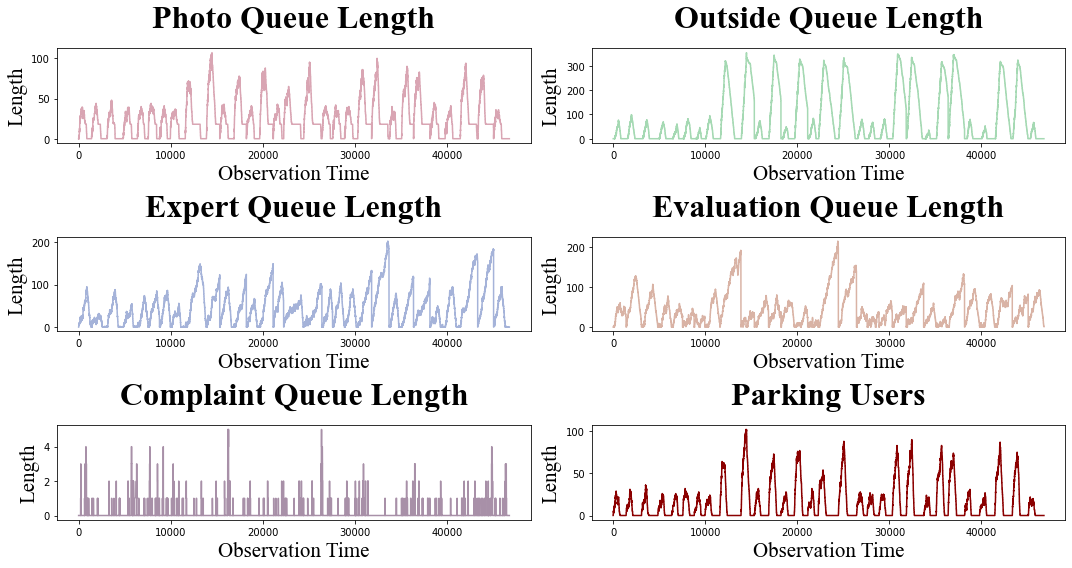

In [77]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set the font family
font_family = 'Times New Roman'

# Set the font properties
font_props = font_manager.FontProperties(family=font_family)

# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8))

# Define colors for each plot
colors = ['#D9A5B3', '#A5D9B3', '#A5B3D9', '#D9B3A5', '#A890A8', '#8B0000']

# Plot 1
axes[0, 0].step(chosen_observation_data['Observation Time'], chosen_observation_data['Photography Queue Length'], color=colors[0])
axes[0, 0].set_title('Photo Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=21)

# Plot 2
axes[0, 1].step(chosen_observation_data['Observation Time'], chosen_observation_data['Outside Queue Length'], color=colors[1])
axes[0, 1].set_title('Outside Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=21)

# Plot 3
axes[1, 0].step(chosen_observation_data['Observation Time'], chosen_observation_data['Expert Queue Length'], color=colors[2])
axes[1, 0].set_title('Expert Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=21)

# Plot 4
axes[1, 1].step(chosen_observation_data['Observation Time'], chosen_observation_data['Evaluation Queue Length'], color=colors[3])
axes[1, 1].set_title('Evaluation Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=21)

# Plot 5
axes[2, 0].step(chosen_observation_data['Observation Time'], chosen_observation_data['Complaint Queue Length'], color=colors[4])
axes[2, 0].set_title('Complaint Queue Length', fontproperties=font_props, fontsize = 32, weight='bold', pad=21)

# Plot 6
axes[2, 1].step(chosen_observation_data['Observation Time'], chosen_observation_data['Parking Usage'], color=colors[5])
axes[2, 1].set_title('Parking Users', fontproperties=font_props, fontsize = 32, weight='bold', pad=21)


# Set font properties for all labels and ticks
for ax in axes.flatten():
    ax.set_xlabel('Observation Time', fontproperties=font_props, fontsize = 21)
    ax.set_ylabel('Length', fontproperties=font_props, fontsize = 21)
    ax.tick_params(axis='both', labelsize=10, labelrotation=0)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<span style="font-family: Times New Roman; font-size: 13pt;">

In the last code block, the purpose is to generate a DataFrame called `state_variable_data` by combining the data from `chosen_observation_data` based on a condition. Then it merges this `state_variable_data` DataFrame with `FEL_processed` DataFrame to create a new DataFrame called `FEL`. Finally, the `FEL` DataFrame is saved to a CSV file named "FEL.csv" on the desktop.

The code starts by initializing an empty DataFrame called `state_variable_data` with columns specified in `observation_column_names`. This DataFrame will store the selected observation data.

Next, a loop is executed over the indices of the `FEL_processed` DataFrame using the `range` function. For each iteration, the code concatenates `state_variable_data` with a subset of `chosen_observation_data` based on a condition. The condition compares the absolute difference between the 'Observation Time' column in `chosen_observation_data` and the 'Time' column in `FEL_processed` with half of the `observation_step` value. The subset of `chosen_observation_data` satisfying the condition is concatenated with `state_variable_data` using `pd.concat` function, and the result is assigned back to `state_variable_data`.

After the loop completes, the code drops the 'Observation Time' column from `state_variable_data` using the `drop` function, and then resets the index of the DataFrame using the `reset_index` method with the `drop` parameter set to `True`.

Next, the code concatenates `FEL_processed` and `state_variable_data` DataFrames along the columns using `pd.concat`, and assigns the result to a new DataFrame called `FEL`.

Finally, the `FEL` DataFrame is saved to a CSV file named "FEL.csv" in the specified path using the `to_csv` function.

It should be noted that since our FEL Data is rather large (about 90 thousand rows) the following code takes a lot of time to perform. If we even use a smaller observation step, it could take hours. This is because The observation is done for small increments and when trying to find a close match to it, it should itterate a huge amount of time (something in billion area!).

<span>

In [ ]:
# Create an empty DataFrame called state_variable_data with columns specified in observation_column_names
state_variable_data = pd.DataFrame(columns=observation_column_names)

# Iterate over the indices of FEL_processed DataFrame
for i in range(len(FEL_processed)):
    # Concatenate state_variable_data with chosen_observation_data based on a condition
    # The condition checks the absolute difference between 'Observation Time' in chosen_observation_data and 'Time' in FEL_processed
    # The concatenated DataFrame is assigned back to state_variable_data
    state_variable_data = pd.concat([
        state_variable_data,
        chosen_observation_data.loc[
            abs(chosen_observation_data['Observation Time'] - FEL_processed['Time'][i]) < observation_step / 2
        ]
    ], axis=0)

    # Drop the 'Observation Time' column from state_variable_data and reset the index
    state_variable_data = state_variable_data.drop(columns=['Observation Time']).reset_index(drop=True)

# Concatenate FEL_processed and state_variable_data along the columns and assign it to FEL DataFrame
FEL = pd.concat([FEL_processed, state_variable_data], axis=1)

# Save FEL DataFrame to a CSV file named "FEL.csv" in the specified path
FEL.to_csv("E:\Desktop\FEL.csv")
